<a href="https://colab.research.google.com/github/SergeiSa/Control-Theory-Slides-Spring-2022/blob/main/Practice/Practice_6_TrajectoryTracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practice 6: Control design regulation and tracing**
## **Goals for today**

---

During today practice we will:
* Recall the pole placement and root locus techniques
* Learn control strategy for affine systems
* Consider an error dynamics



## **Pole Placement**

There is a technique for finding suitable $\mathbf{K}$ matrix that would produced desired eigenvalues of the $\mathbf{A}_c$ system. It is called pole placement.

Watch the intoduction to pole placement for self-study: [link](https://www.youtube.com/watch?v=FXSpHy8LvmY&ab_channel=MATLAB). Notice the difference between the approach to "steady state" control design show there, and in the lecture.

In [ ]:
from scipy.signal import place_poles
import numpy as np

A = [[3,1],
     [1,3]]

B = [[0],
     [1]]

P = [-1, -2]

Lambda, Q = np.linalg.eig(A)
print(f"Eigen values of original system:\n{Lambda}\n")

pp =place_poles(np.array(A), np.array(B), np.array(P))

K = pp.gain_matrix
print(f"Calculated gains:\n{K}\n")

Lambda, Q = np.linalg.eig(A-np.dot(B, K))
print(f"Eigen values:\n{Lambda}")

Eigen values of original system:
[4. 2.]

Calculated gains:
[[21.  9.]]

Eigen values:
[-1. -2.]


## **Root Locus**

Consider the following question: given system $\dot{\mathbf{x}} = \mathbf{A}\mathbf{x}+\mathbf{B}\mathbf{u}$ and control $\mathbf{u} = 
-\mathbf{K} \mathbf{x}$, how does the change in $\mathbf{K}$ changes the eigenvalues of theresulting matrix $\mathbf{A} - \mathbf{B}\mathbf{K}$?

Root locus method is drawing the graph of eigenvalues of the matrix $\mathbf{A} - \mathbf{B}\mathbf{K}$ for a given change of matrix $\mathbf{K}$ . We only vary a single component of $\mathbf{K}$ , so the result is a line.

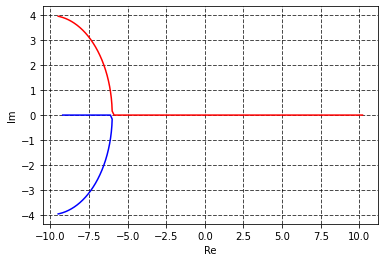

In [ ]:
from matplotlib.pyplot import *


A = np.array([[1, -7],
              [2, -10]])

B = np.array([[1],
              [0]])

K0 = np.array([[1., 1.]])

k_min = -10;
k_max = 10;
k_step = 0.01;

Count = int(np.floor((k_max-k_min)/k_step))

k_range = np.linspace(k_min, k_max, Count)
E = np.zeros((Count, 4))

for i in range(Count):
    K0[0, 0] = k_range[i]
    ei, v = np.linalg.eig((A - B.dot(K0)))

    E[i, 0] = np.real(ei[0])
    E[i, 1] = np.imag(ei[0])
    E[i, 2] = np.real(ei[1])
    E[i, 3] = np.imag(ei[1])

    #print("eigenvalues of A - B*K:", ei)


plot(E[:, 0], E[:, 1], color = 'r')
plot(E[:, 2], E[:, 3], color = 'b')
xlabel(r'Re')
ylabel(r'Im')
ylim()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
show()

## **Affine control systems**
Affine system can be writing by the following way:
\begin{equation}
\mathbf{\dot{x}}=\mathbf{A}\mathbf{x}+\mathbf{B}\mathbf{u}+\mathbf{c}
\end{equation}
when $\mathbf{c}$ is a constant term.

>### **Example**

> **Mass-spring-damper system**
>
>You can imagine this system like a mass-spring-damper with gravity
>
><p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1ouEckIc8hm6IOTJ5uGVJHCwx2tBeyKj8" align="center" hspace="350px" vspace="0px"></p>
>
>ODE for this system is:
\begin{equation}
m\ddot{y}+b\dot{y}+ky=F-mg
\end{equation}
We can rewrite this equation in terms of affine control systems:
\begin{equation}
\mathbf{\dot{x}}=\begin{bmatrix} 0 & 1 \\ -\frac{k}{m} & -\frac{b}{m}
\end{bmatrix}\mathbf{x} + \begin{bmatrix} 0 \\ \frac{1}{m}
\end{bmatrix}\mathbf{u}+\begin{bmatrix} 0 \\ -g
\end{bmatrix}
\end{equation}
>
>when $\mathbf{x}=\begin{bmatrix} y \\ \dot{y}
\end{bmatrix}$ and $\mathbf{u}=F$
>
>Let's simulate this system without control part.

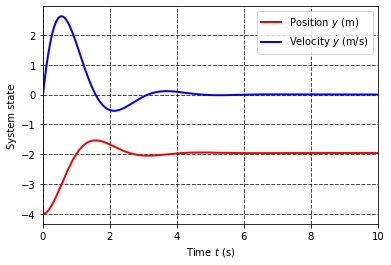

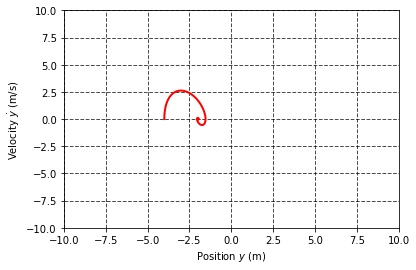

In [ ]:
from scipy.integrate import odeint

def StateSpace_affine_without_control(x, t, A, c):
  return np.dot(A,x)+c

m = 1
b = 2
k = 5
g = 9.8

t0 = 0
tf = 10
t = np.linspace(t0, tf, 1000)

A = np.array([[0, 1],
              [-k/m, -b/m]])

B = np.array([[0],
              [1/m]])

c = np.array([0,
              -g])

x0 = np.array([-4, 0])

x_sol = odeint(StateSpace_affine_without_control, x0, t, args=(A,c))

y, dy = x_sol[:,0], x_sol[:,1]

plot(t, y, 'r', linewidth=2.0, label = r'Position $y$ (m)')
plot(t, dy, 'b', linewidth=2.0, label = r'Velocity $\dot{y}$ (m/s)')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'System state')
xlabel(r'Time $t$ (s)')
show()

plot(y, dy, 'r', linewidth = 2.)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'Velocity $\dot{y}$ (m/s)')
xlabel(r'Position $y$ (m)')
xlim([-10, 10])
ylim([-10, 10])
show()

>As you can see when we add a constant term we obtain that convergence point is not zero for this system. Let's imagine a task when we should to design the control input to stabilize this system at point $\mathbf{x^*}(t)=0$.
>
>So, we can design our controller by the following law:
\begin{equation}
\mathbf{u}=-\mathbf{K}\mathbf{x}+\mathbf{u^*}
\end{equation}
where $\mathbf{u^*}$ will compensate the constant term in this system.
When we put this control law into affine control equation we get:
\begin{equation}
\mathbf{\dot{x}}=\mathbf{Ax}-\mathbf{BK}\mathbf{x}+\mathbf{Bu^*}+\mathbf{c}
\end{equation}
>
>To compensate the constant term we can choose $$\mathbf{u^*}=-\mathbf{B^+c}$$
>
>When $\mathbf{B^+}$ is Moore-Penrose inverse operator (or pseudoinverse). In case when each elements of matrix $\mathbf{B}$ is real and rows linearly independent we can $\mathbf{B^+}$ can be computed as:
$$ \mathbf{B^+}=\mathbf{B}^T\left(\mathbf{BB}^T\right)^{-1}$$
This is right inverse as $\mathbf{BB^+}=I$.
>
>More information about this operator is available [here](https://en.wikipedia.org/wiki/Moore–Penrose_inverse).
>
>In the result we get the following control law:
\begin{equation}
\mathbf{u}=-\mathbf{K}\mathbf{x}-\mathbf{B^+c}
\end{equation}
When $-\mathbf{K}\mathbf{x}$ is feedback part and $\mathbf{B^+c}$ is feedforward part.

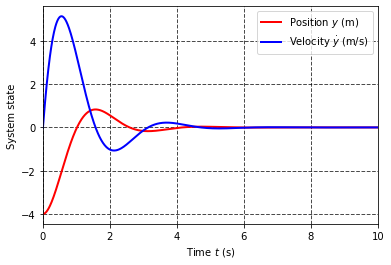

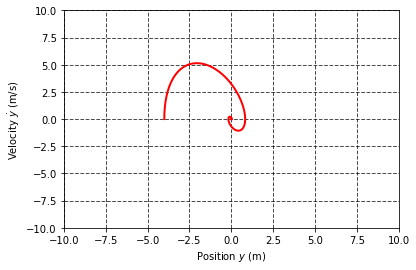

In [ ]:
def StateSpace_affine(x, t, A, B, c, K):
  u_fb = -np.dot(K,x)
  u_ff = -np.linalg.pinv(B).dot(c)
  u = u_fb+u_ff
  return np.dot(A,x)+np.dot(B,u)+c

K = np.array([[0,0]])

x_sol = odeint(StateSpace_affine, x0, t, args=(A,B,c,K))

y, dy = x_sol[:,0], x_sol[:,1]

plot(t, y, 'r', linewidth=2.0, label = r'Position $y$ (m)')
plot(t, dy, 'b', linewidth=2.0, label = r'Velocity $\dot{y}$ (m/s)')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'System state')
xlabel(r'Time $t$ (s)')
show()

plot(y, dy, 'r', linewidth = 2.)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'Velocity $\dot{y}$ (m/s)')
xlabel(r'Position $y$ (m)')
xlim([-10, 10])
ylim([-10, 10])
show()

>### **Exercises**
> Compute the control law $\mathbf{u}$  to stabilize (this mean $\mathbf{x^*}(t)=0$) the following systems:
1. $
\mathbf{\dot{x}}=\begin{bmatrix}
1 & 1\\
-6 & -2
\end{bmatrix}\mathbf{x} + \begin{bmatrix}
3 & 1\\
1 & 0
\end{bmatrix}\mathbf{u} +\begin{bmatrix}
0\\
20
\end{bmatrix}
$
>
>2. $
\mathbf{\dot{x}}=\begin{bmatrix}
0 &2\\
-1 & -5
\end{bmatrix}\mathbf{x} + \begin{bmatrix}
2 & 2\\
0 & 5
\end{bmatrix}\mathbf{u} +\begin{bmatrix}
1\\
5
\end{bmatrix}
$

In [ ]:
B = np.array([[0, 0],
              [0, 1]])
c = np.array([0, 1])

u_star = -np.linalg.pinv(B).dot(c)

print("B+ = ",np.linalg.pinv(B))
print("u* = ",u_star)

B+ =  [[0. 0.]
 [0. 1.]]
u* =  [-0. -1.]


## **Error dynamics**

Consider the following system:
\begin{equation}
\mathbf{\dot{x}}=\mathbf{A}\mathbf{x}+\mathbf{B}\mathbf{u}
\end{equation}
with some trajectory $\mathbf{x^*}=\mathbf{x^*}(t)$, this mean that this solution is satisfies this equation:
\begin{equation}
\mathbf{\dot{x}^*}=\mathbf{A}\mathbf{x^*}+\mathbf{B}\mathbf{u^*}
\end{equation}
When $\mathbf{u^*}$ is control law when this trajectory exist. This law can be calculated by the following way:
$$\mathbf{u^*}=\mathbf{B^+}\left(\mathbf{\dot{x}^*}-\mathbf{Ax^*} \right)$$

After this we can change our system into the error control concept:
$$ \mathbf{e}=\mathbf{x}-\mathbf{x^*} $$
and now e can get the following form of our system:
$$
\mathbf{\dot{e}}=\mathbf{Ae}+\mathbf{Bv}
$$
where $\mathbf{v}=\mathbf{u}-\mathbf{u^*}$.
Assyme that for this system we can choose the linear control rule:
$$\mathbf{v}=-\mathbf{Ke}$$
This mean that the final control law for original system is:
$$\mathbf{u}=-\mathbf{K}(\mathbf{x}-\mathbf{x^*})+\mathbf{u^*} $$

>### **Example**
>
> **Mass-spring-damper system**
>
> The equation for the unforced system:
\begin{equation}
m\ddot{y}+b\dot{y}+ky=F
\end{equation}
Consider the situation when we want to bring the system to the position $y^* = 3$ and hold it there. This mean that $\dot{y}^* = 0$ and $\ddot{y}^* = 0$. If we will substitude this solution into original ODE we will consider needed force for this position is $F^* = ky^*$ and this is equivelent solution as $\mathbf{u^*}=\mathbf{B^+}\left(\mathbf{\dot{x}^*}-\mathbf{Ax^*} \right)$

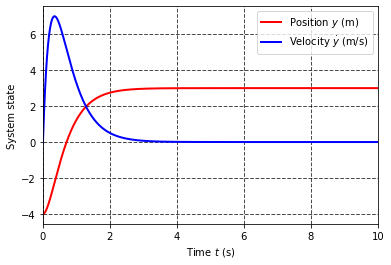

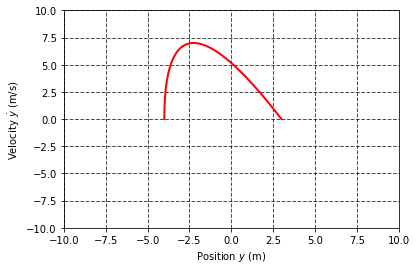

In [ ]:
def StateSpace(x, t, A, B, K, x_des, dx_des):
  u_ff = np.linalg.pinv(B) @ (dx_des - A @ x_des)
  u_fb = - K @ (x-x_des) 
  u = u_fb + u_ff
  return A @ x + B @ u

A = np.array([[0, 1],
              [-k/m, -b/m]])

B = np.array([[0],
              [1/m]])

K = np.array([[3,4]])

x_des = np.array([3, 0])
dx_des = np.array([0, 0])
x0 = np.array([-4, 0])

StateSpace(x0, t, A, B, K, x_des, dx_des)

x_sol = odeint(StateSpace, x0, t, args=(A, B, K, x_des, dx_des))

y, dy = x_sol[:,0], x_sol[:,1]

plot(t, y, 'r', linewidth=2.0, label = r'Position $y$ (m)')
plot(t, dy, 'b', linewidth=2.0, label = r'Velocity $\dot{y}$ (m/s)')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'System state')
xlabel(r'Time $t$ (s)')
show()

plot(y, dy, 'r', linewidth = 2.)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'Velocity $\dot{y}$ (m/s)')
xlabel(r'Position $y$ (m)')
xlim([-10, 10])
ylim([-10, 10])
show()

>The same idea with trajectory following. Let our mass spring damper describe the trajectory $y^* = \sin{t}$. Then $\dot{y}^* = \cos{t}$ and $\ddot{y}^* = -\sin{t}$. Then our force should be $F = -m\sin{t} + b\cos{t}+ k \sin{t}$.  

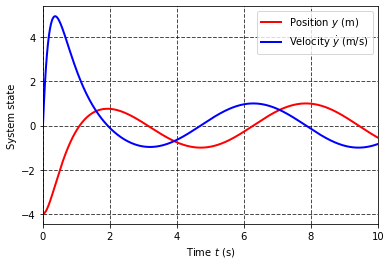

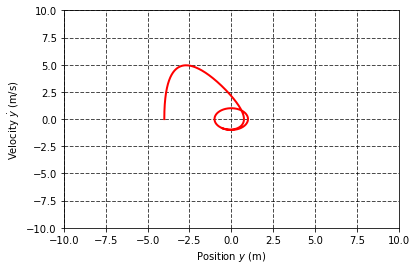

In [ ]:
def trajectory(t):
  x_des = np.array([np.sin(t),np.cos(t)])
  dx_des = np.array([np.cos(t),-np.sin(t)])
  return x_des, dx_des


def StateSpace_trajectory(x, t, A, B, K):
  x_des, dx_des = trajectory(t)
  u_ff = np.linalg.pinv(B) @ (dx_des - A @ x_des)
  u_fb = - K @ (x-x_des) 
  u = u_fb + u_ff
  return A @ x + B @ u

A = np.array([[0, 1],
              [-k/m, -b/m]])

B = np.array([[0],
              [1/m]])

K = np.array([[3,4]])

x_des = np.array([3, 0])
dx_des = np.array([0, 0])
x0 = np.array([-4, 0])

StateSpace(x0, t, A, B, K, x_des, dx_des)

x_sol = odeint(StateSpace_trajectory, x0, t, args=(A, B, K))

y, dy = x_sol[:,0], x_sol[:,1]

plot(t, y, 'r', linewidth=2.0, label = r'Position $y$ (m)')
plot(t, dy, 'b', linewidth=2.0, label = r'Velocity $\dot{y}$ (m/s)')
legend()
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'System state')
xlabel(r'Time $t$ (s)')
show()

plot(y, dy, 'r', linewidth = 2.)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
ylabel(r'Velocity $\dot{y}$ (m/s)')
xlabel(r'Position $y$ (m)')
xlim([-10, 10])
ylim([-10, 10])
show()

>### **Exercises**
>1. Compute the control law $\mathbf{u}$ for following systems:
>* $\dot x = \begin{bmatrix}-8 & 1 \\ -2 & 2
\end{bmatrix}x+
\begin{bmatrix} 2 \\ 0\end{bmatrix}u
\quad \quad \quad x_d = \begin{bmatrix} 10 \\ 10\end{bmatrix}$
>
>
>* $\dot x = \begin{bmatrix}-3 & 7 \\ -1 & -10
\end{bmatrix}x+
\begin{bmatrix} 3 \\ 1\end{bmatrix}u
\quad \quad \quad x_d = \begin{bmatrix} 3 \\ 0\end{bmatrix}$
>
>
>* $\dot x = \begin{bmatrix}0 & -1 \\ -1 & 3
\end{bmatrix}x+
\begin{bmatrix} 1 \\ -4\end{bmatrix}u
\quad \quad \quad x_d = \begin{bmatrix} 5 \\ -5\end{bmatrix}$
>
>
> 2. Compute control law for $\mathbf{u}$ for mass spring dampher with trajectory $y = A \cos (wt)$. Take gravity into account.
>
>
> 3. Calculate the position control for a motor in which you can only control the current. A simplified model of the motor dynamics for this situation:
> $$J\ddot{\theta}+b\dot{\theta} = K_m I$$
> when $J$ - motor rotor moment of inertia, $b$ - coefficient of viscous friction, $K_m$ - motor torque constant